# standard python and R imports

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [6]:
%%R
data = read.csv("provider_data.csv")
data

    TRACT provider_count                                           NAME
1    1100              1        Census Tract 11; Kings County; New York
2    1401              2  Census Tract 14.01; New York County; New York
3    2800              2     Census Tract 28; New York County; New York
4    3100              1     Census Tract 31; New York County; New York
5    4200              1     Census Tract 42; New York County; New York
6    6100              2        Census Tract 61; Bronx County; New York
7    6200              1        Census Tract 62; Kings County; New York
8    7002              2  Census Tract 70.02; New York County; New York
9    7300              2        Census Tract 73; Bronx County; New York
10   7300              2     Census Tract 73; New York County; New York
11   7500              2     Census Tract 75; Richmond County; New York
12   8100              1     Census Tract 81; New York County; New York
13   9000              1     Census Tract 90; New York County; N

# single variable regression: provider_count vs population

In [8]:
%%R

model <- lm(provider_count~populationE, data=data)
summary(model)


Call:
lm(formula = provider_count ~ populationE, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8437 -0.7730  0.1498  0.2347  4.2335 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.729e+00  3.031e-01   5.705 6.63e-07 ***
populationE 1.204e-05  5.746e-05   0.210    0.835    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.075 on 49 degrees of freedom
Multiple R-squared:  0.0008952,	Adjusted R-squared:  -0.01949 
F-statistic: 0.0439 on 1 and 49 DF,  p-value: 0.8349



`geom_smooth()` using formula = 'y ~ x'


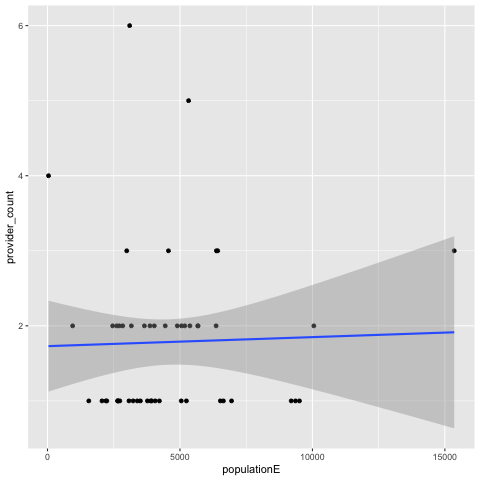

In [10]:
%%R 

ggplot(data) + 
	aes(x=populationE, y=provider_count) + 
	geom_point() +
	geom_smooth(method='lm')

In [13]:
%%R
outlier <- data[data$provider_count >= 4.0, ]
print(outlier)

   TRACT provider_count                                        NAME populationE
24 17200              5 Census Tract 172; New York County; New York        5325
37 33400              4    Census Tract 334; Bronx County; New York          38
49 86000              6    Census Tract 860; Kings County; New York        3101
   med_incE whiteE AsianE Black_African_AmericanE
24    31068   1087    279                    1739
37       NA      1      0                      36
49    73450      5      0                    2845
   American_Indian_Alaska_NativeE poverty_totalE poverty_belowE
24                              0           5319           1536
37                              0             38              3
49                              0           3100            232
   providers_per_1000
24          0.9389671
37        105.2631579
49          1.9348597


### Census Tract 33400 in Bronx which has a population of 38 has 4 providers.
### What's up with that?